## Quiz #0502

### "Human Activity Recognition" 

#### Answer the following questions by providing Python code:
#### Objectives:
- Carry out the EDA.
- Carry out the data pre-processing.
- Optimize and test a predictive model of your choice.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [46]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own. 

In [47]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [48]:
df.shape

(19622, 160)

In [49]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

1). Carry out the EDA. Check for the missing values. HINT: The response variable is 'classe'.

In [50]:
df.columns[df.isna().any()]

Index(['kurtosis_roll_belt', 'kurtosis_picth_belt', 'kurtosis_yaw_belt',
       'skewness_roll_belt', 'skewness_roll_belt.1', 'skewness_yaw_belt',
       'max_roll_belt', 'max_picth_belt', 'max_yaw_belt', 'min_roll_belt',
       'min_pitch_belt', 'min_yaw_belt', 'amplitude_roll_belt',
       'amplitude_pitch_belt', 'amplitude_yaw_belt', 'var_total_accel_belt',
       'avg_roll_belt', 'stddev_roll_belt', 'var_roll_belt', 'avg_pitch_belt',
       'stddev_pitch_belt', 'var_pitch_belt', 'avg_yaw_belt',
       'stddev_yaw_belt', 'var_yaw_belt', 'var_accel_arm', 'avg_roll_arm',
       'stddev_roll_arm', 'var_roll_arm', 'avg_pitch_arm', 'stddev_pitch_arm',
       'var_pitch_arm', 'avg_yaw_arm', 'stddev_yaw_arm', 'var_yaw_arm',
       'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm',
       'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm',
       'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 'min_roll_arm',
       'min_pitch_arm', 'min_yaw_arm', 'amplitude_roll_arm'

2). Get rid of the columns that have more than 97% missing values.

In [51]:
missgv=[]
for k, v in (df.isnull().sum()).to_dict().items():
    if v>0.97*19622:
        missgv.append(k)

In [52]:
df.drop(missgv,axis=1,inplace=True)

3). Get rid of the unnecessary columns. HINT: Those columns with "time" in the name and those that are obviously unnecessary.

In [53]:
#df.columns
df.drop(["raw_timestamp_part_1","raw_timestamp_part_2", "cvtd_timestamp"],axis=1,inplace=True)

4). Label encode the responde variable. HINT: use preprocessing.LabelEncoder(). 

In [54]:
num_cols = df._get_numeric_data().columns
cat_cols = set(df.columns) - set(num_cols)
print(cat_cols)

{'classe', 'new_window', 'user_name'}


In [55]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['new_window_Cat'] = labelencoder.fit_transform(df['new_window'])
df['user_name_Cat'] = labelencoder.fit_transform(df['user_name'])
df['classe_Cat'] = labelencoder.fit_transform(df['classe'])
df.drop(["new_window","user_name", "classe"],axis=1,inplace=True)

5). Carry out min-max scaling of the exploratory variables. HINT: use preprocessing.MinMaxScaler().

In [56]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df)

6). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s)
- Calculate the accuracy.
- Aim for upper 90% accuracy.

In [57]:
y = df['classe_Cat'].values
X = df.drop('classe_Cat', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Classification by Random Forest.
RFC = RandomForestClassifier(n_estimators=100,max_depth=4,min_samples_leaf=3,random_state=123)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print( "Random Forest accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Random Forest accuracy : 0.918


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1665
           1       0.93      0.92      0.92      1139
           2       0.74      0.96      0.83      1006
           3       0.95      0.81      0.87       979
           4       1.00      0.86      0.92      1098

    accuracy                           0.92      5887
   macro avg       0.92      0.91      0.91      5887
weighted avg       0.93      0.92      0.92      5887



In [59]:
#Hyperparameter
param_grid  = { 'max_depth': [4,6],
           #'min_samples_split': [2, 5, 10],
           'min_samples_leaf':[3,4], 
           'n_estimators': [100]}

RFC = RandomForestClassifier(random_state=0) 
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, scoring='accuracy', verbose = 1)
grid_search.fit(X_train, y_train)
# I didn't make too much hyperparameter because my pc has been turned off several times

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   43.7s finished


GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6], 'min_samples_leaf': [3, 4],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=1)

In [60]:
print("Best parameters:", grid_search.best_params_)
print("Best score : {:.2f}". format(grid_search.best_score_))

Best parameters: {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 100}
Best score : 0.96


In [61]:
y_pred = grid_search.predict(X_test)
print("Accuracy = {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy = 0.97


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1665
           1       0.97      0.98      0.97      1139
           2       0.90      0.97      0.93      1006
           3       0.96      0.94      0.95       979
           4       1.00      0.94      0.97      1098

    accuracy                           0.97      5887
   macro avg       0.97      0.97      0.97      5887
weighted avg       0.97      0.97      0.97      5887



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

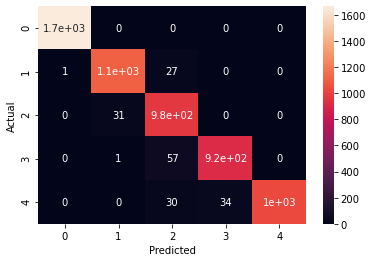

In [63]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)